# Movies Mini-project
---

In a previous worksheet we converted an SQL relational database to a single pandas dataframe and downloaded it. Now I will be analysing it.
A copy of the file is located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [ ]:
import pandas as pd
url="https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df_movies=pd.read_csv(url)

def display_movies_table(df):
  display(df.info)
  display(df.head())

display_movies_table(df_movies)




<bound method DataFrame.info of         Unnamed: 0 first_name    last_name  \
0                0        Les  12 Poissons   
1                1    Lejaren     a'Hiller   
2                2   Khairiya    A-Mansour   
3                3    Ricardo     A. Solla   
4                4    Ricardo     A. Solla   
...            ...        ...          ...   
368889      368889      Yusuf         Ünal   
368890      368890      Ahmet        Ündag   
368891      368891       Idil         Üner   
368892      368892     Yüksel        Ünsal   
368893      368893     Yüksel        Ünsal   

                                      name  year  rank        genre  
0                     Rondo pour trompette  2002   NaN        Short  
1                 Sleep of Cyma Roget, The  1920   NaN        Drama  
2                         Churches in Iraq  1988   NaN  Documentary  
3                                 Foto, La  2001   NaN        Drama  
4                                 Foto, La  2001   NaN        Sho

,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


### Clean the dataset 
---


In [ ]:
#This function cleans the dataset
def clean_df(df):
  df=df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
  df= df.dropna()
  return df

clean_df_movies=clean_df(df_movies)

#Check the difference in the length of the two dataframes.
print(df_movies.info())
print(clean_df_movies.info())
#Comment: There are no duplicates in the df and only one column "rank" has gor some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float

### How many movies of each genre are there?
---

In [ ]:
#This function counts the number of movies by category
def count_movies_by_category(df,category):
  df_category=df[category].value_counts()
  return df_category

count_movies_by_genre=count_movies_by_category(clean_df_movies,"genre")
print(count_movies_by_genre)


Drama          24696
Comedy         20633
Short           9894
Action          5873
Romance         5476
Thriller        5440
Family          4845
Animation       4727
Crime           4488
Documentary     4296
Horror          4227
Adventure       3932
Sci-Fi          2699
Musical         2491
Western         2364
Fantasy         2123
Mystery         2012
War             1837
Music            908
Film-Noir        415
Name: genre, dtype: int64


### Which director has the highest ranked movies?
---

In [ ]:
import numpy as np
def find_max_in_df(df,what_to_find,column_condition):
  threshold=df[column_condition].max()
  filter_df=df[df["rank"]==threshold]
  return filter_df

director_highest_ranked_movies=find_max_in_df(clean_df_movies,"last_name","rank")
print( "The list of directors with the highest ranked movie is""\n",director_highest_ranked_movies["last_name"].value_counts())
print("The director with the highest number of highest ranked movie is",director_highest_ranked_movies["last_name"].value_counts().head(1))

The list of directors with the highest ranked movie is
 Roussopoulos    5
Resnicoff       4
Zehentner       3
Barkan          3
Bose            3
Bracho          3
Wieder          2
Tarrier         2
Nicolaescu      2
Hurtz           2
Holmes          2
Demme           2
Cappelletti     2
Crandall        2
Cassavetes      2
Eisenstein      1
Christensen     1
Zebriünas       1
Bernal          1
Trnka           1
Tretbar         1
Salamon         1
Pudovkin        1
Gance           1
Ng              1
Jarmusch        1
Jankovics       1
Daneliya        1
Hanzekovic      1
Grybcheva       1
Annensky        1
Name: last_name, dtype: int64
The director with the highest number of highest ranked movie is Roussopoulos    5
Name: last_name, dtype: int64


### How many movies have ranks of over 9?
---


In [ ]:
def find_number_movies_over_threshold(df,column_condition,threshold):
  df=df[df[column_condition]>threshold]
  return len(df)

number_movies=find_number_movies_over_threshold(clean_df_movies,"rank",9)
print(number_movies, "are the movise whose rank is higher than 9")

1483 are the movise whose rank is higher than 9


### Plot a bar chart of mean rank and genre
---

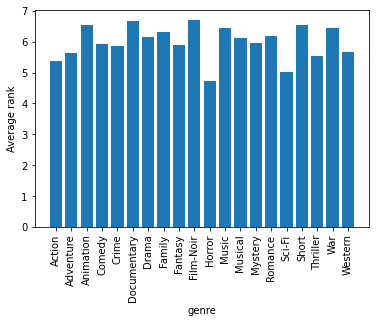

In [ ]:
import matplotlib.pyplot as plt

def create_bar_chart_meanRank_bygenre(df,Column_mean,Column_groupedBy):
  rk=df.groupby([Column_groupedBy])[Column_mean].mean()
  labels=rk.keys()
  plt.xlabel(Column_groupedBy)
  plt.ylabel("Average "+Column_mean)
  plt.bar(labels,rk)
  plt.xticks(rotation=90)
  plt.show()

create_bar_chart_meanRank_bygenre(clean_df_movies,"rank","genre")

### Plot a pie chart of how many movies of each genre there are 
---


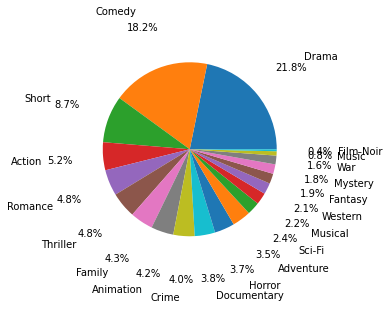

In [ ]:
def create_pie_chart_movies_byGenre(df,groupBy_column):
  df=df[groupBy_column].value_counts()
  #Calculate the percentage to add to the pie chart
  tot_movies=df.count()
  perc_by_genre=df/tot_movies*100
  labels=df.keys()
  plt.pie(df, labels = labels,autopct='%1.1f%%', pctdistance=1.5, labeldistance=1.7)
  plt.show

create_pie_chart_movies_byGenre(clean_df_movies,"genre")

### Plot a graph showing the mean Rank for each year 

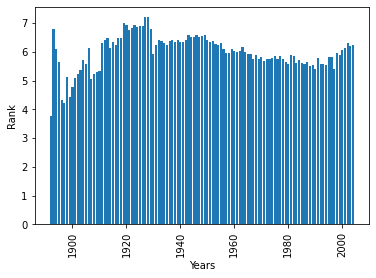

In [ ]:
def calculate_meanRank_per_yr(df):
  rk_by_yr=df.groupby(["year"])["rank"].mean()
  labels=rk_by_yr.keys()
  return rk_by_yr,labels

rank_by_year, labels=calculate_meanRank_per_yr(clean_df_movies)

def create_bar_chart_AverageRank_byYear(df,labels):
  plt.xlabel('Years')#label the axis
  plt.ylabel('Rank')
  plt.bar(labels,df)
  plt.xticks(rotation=90)
  plt.show()

create_bar_chart_AverageRank_byYear(rank_by_year,labels)



### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Something else I could try to get from the dataframe is:

1.  Year with most movies produced
2.  Year with highest rank /highest mean rank
3.  Genre with the highest rank 

### Complete the tasks you have set out in the exercise above. 
---


In [ ]:
def calculate_statistics_movies(df,col_calculate,col_groupby,func):
  if func=="max":
    yr_max_movies=df.groupby([col_groupby])[col_calculate].count().max()
    yr_max=df.groupby([col_groupby])[col_calculate].count().idxmax()
  elif func=="min":
     yr_max_movies=df.groupby([col_groupby])[col_calculate].count().min()  
     yr_max=df.groupby([col_groupby])[col_calculate].count().idxmin() 
  elif func=="mean":
     yr_max=df.groupby([col_groupby])[col_calculate].mean() 
  elif func=="median":
     yr_max=df.groupby([col_groupby])[col_calculate].median() 
  else:
    print ("Insert a valid function")
  return yr_max

# 1. Find the Year with most movies produced
year_max_movie=calculate_statistics_movies(clean_df_movies,"year","year","max")
print(year_max_movie,"is the year where most of the moview were produced")

# 2. Find the Year with highest mean rank
year_highest_rank=calculate_statistics_movies(clean_df_movies,"rank","year","mean")
print(year_highest_rank.idxmax(),"is the year with the highest mean rank: ", year_highest_rank.max())

# 3. Find the Genre with the highest mean rank 
genre_highest_mean_rank=calculate_statistics_movies(clean_df_movies,"rank","genre","mean")
print(genre_highest_mean_rank.idxmax(),"is the genre with the highest mean rank: ", genre_highest_mean_rank.max())  


2002 is the year where most of the moview were produced
1927 is the year with the highest mean rank:  7.1942583732057415
Film-Noir is the genre with the highest mean rank:  6.70289156626506


# Reflection
----

## What skills have you demonstrated in completing this notebook?

• Reading a dataframe from a csv file
• Cleaning a dataframe: remove duplicates, and dropping null values which would not cause issues to our analysis
• Group values by one characteristic (column) and calculate statistics on it


## What caused you the most difficulty?

Your answer: